In [5]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

In [6]:
data_filtro1="2020-03-10"
data_filtro2="2020-03-11"
data_filtro3="2020-03-12"

In [7]:
dados=pd.read_csv("leituras2020-03.csv")

In [8]:
dados[dados.data==data_filtro1]

,id,data,hora,temperatura,humidade,ip,luz,acesso
496,3822,2020-03-10,00:01:25,23.2,99.9,187.33.180.160,25,0
497,3823,2020-03-10,00:21:31,22.9,99.9,187.33.180.160,25,0
498,3824,2020-03-10,00:41:37,22.8,99.9,187.33.180.160,25,0
499,3825,2020-03-10,01:01:43,22.6,99.9,187.33.180.160,25,0
500,3826,2020-03-10,01:21:49,22.5,99.9,187.33.180.160,25,0
501,3827,2020-03-10,01:41:55,22.4,99.9,187.33.180.160,25,0
502,3828,2020-03-10,02:42:13,21.5,99.9,187.33.180.160,25,0
503,3829,2020-03-10,03:02:19,21.2,99.9,187.33.180.160,29,0
504,3830,2020-03-10,03:22:26,21.1,99.9,187.33.180.160,30,0
505,3831,2020-03-10,04:02:32,20.8,99.9,187.33.180.160,30,0


In [9]:
temperatura1=np.array(dados.temperatura[dados.data==data_filtro1])
#data1=(dados.data[dados.data==data_filtro1]+" "+dados.hora[dados.data==data_filtro1])
#hora1=(dados.hora[dados.data==data_filtro1])
#hora1=np.array(hora1.str[0:5])
hora1=(dados.humidade[dados.data==data_filtro1])

temperatura2=dados.temperatura[dados.data==data_filtro2]
data2=dados.data[dados.data==data_filtro2]+" "+dados.hora[dados.data==data_filtro2]
hora2=dados.hora[dados.data==data_filtro2]
hora2=hora2.str[0:5]

temperatura3=dados.temperatura[dados.data==data_filtro3]
data3=dados.data[dados.data==data_filtro3]+" "+dados.hora[dados.data==data_filtro3]
hora3=dados.hora[dados.data==data_filtro3]
hora3=hora3.str[0:5]


In [186]:
hora1,len(hora1)
#print(hora2)
#print(hora3)

(496    99.9
 497    99.9
 498    99.9
 499    99.9
 500    99.9
 501    99.9
 502    99.9
 503    99.9
 504    99.9
 505    99.9
 506    99.9
 507    99.9
 508    99.9
 509    99.9
 510    99.9
 511    99.9
 512    87.2
 513    70.7
 514    48.6
 515    44.8
 516    40.5
 517    35.6
 518    28.4
 519    27.1
 520    27.1
 521    51.1
 522    55.3
 523    52.7
 524    54.1
 525    57.8
 526    58.3
 527    50.6
 528    51.7
 529    52.8
 530    53.2
 531    54.8
 532    55.6
 533    59.7
 534    59.7
 535    64.1
 536    72.5
 537    79.0
 538    83.4
 539    82.9
 540    78.0
 541    77.8
 542    78.1
 543    89.0
 544    92.0
 545    92.7
 546    94.3
 547    98.1
 548    99.9
 549    99.9
 Name: humidade, dtype: float64, 54)

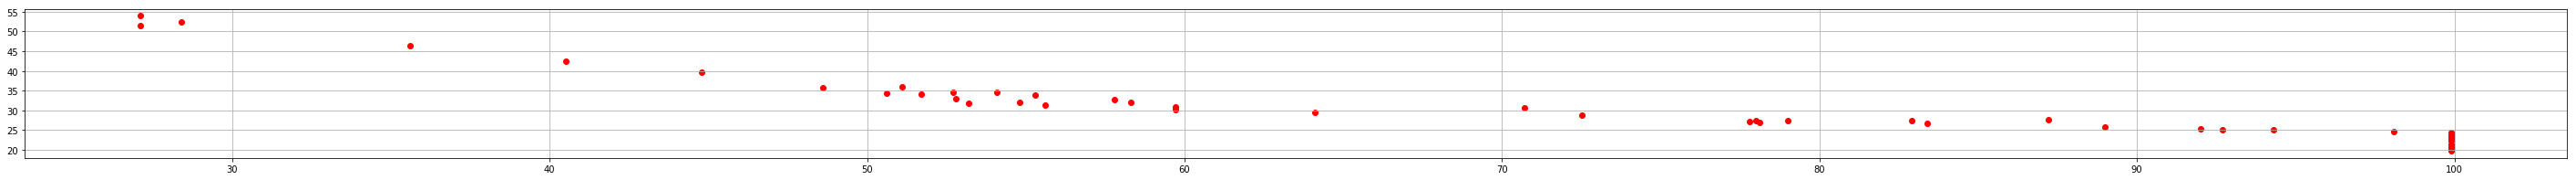

In [10]:
TAMANHO_GRAFICO=(50,3)
plt.figure(figsize=(TAMANHO_GRAFICO))
plt.grid(True)

#plt.plot(hora1,temperatura1,hora2,temperatura2,hora3,temperatura3)
plt.scatter(hora1,temperatura1,color='red')
plt.show()

#plt.figure(figsize=(TAMANHO_GRAFICO))
#plt.grid(True)
#plt.scatter(hora2,temperatura2,color='green')
#plt.show()

#plt.figure(figsize=(TAMANHO_GRAFICO))
#plt.grid(True)
#plt.scatter(hora3,temperatura3,color='black')
#plt.show()
#plt.gca().legend((data_filtro1,data_filtro2,data_filtro3))

#plt.show()


MODELO
IN = HORA 00:00 
OUT = TEMPERATURA

In [20]:
#X=np.array([sub.replace(":",".") for sub in hora1])
#X=X.astype(np.float64)
#X=np.reshape(hora1,(54,1))
#Y=temperatura1.astype(np.float64)
#Y=np.reshape(temperatura1,(54,1))
X=np.array(hora1)
X=np.reshape(X,(54,1))
Y=np.array(temperatura1)
Y=np.reshape(Y,(54,1))
X,Y

(array([[99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [99.9],
        [87.2],
        [70.7],
        [48.6],
        [44.8],
        [40.5],
        [35.6],
        [28.4],
        [27.1],
        [27.1],
        [51.1],
        [55.3],
        [52.7],
        [54.1],
        [57.8],
        [58.3],
        [50.6],
        [51.7],
        [52.8],
        [53.2],
        [54.8],
        [55.6],
        [59.7],
        [59.7],
        [64.1],
        [72.5],
        [79. ],
        [83.4],
        [82.9],
        [78. ],
        [77.8],
        [78.1],
        [89. ],
        [92. ],
        [92.7],
        [94.3],
        [98.1],
        [99.9],
        [99.9]]), array([[23.2],
        [22.9],
        [22.8],
        [22.6],
        [22.5],
        [22.4],
        [21.5],
        [21.2],
       

In [133]:
# PROCURA POR VALORES NAN
count = 0
rows = len(Y)
columns = len(Y[1])
for x in range(0,rows):
 for y in range(0,columns):
  if(Y[x][y] in {'NaN','infinity','nan','Infinity'}):
   Y = np.delete(Y,x,0)
   count = count +1
print("Deleted Rows: "+str(count))


Deleted Rows: 0


In [21]:

#X=np.array([[0.01],[0.21],[0.41],[1.01],[1.21],[1.41],[2.42],[3.02],[3.22],[4.02],[4.22],[6.03],[6.23],[6.43],[7.03],
#           [7.21],[7.41],[8.01],[8.42],[9.02],[9.22],[9.42],[10.22],[11.02],[11.22],[11.43],[12.23],[12.43],[13.23],[13.43],
#           [14.03],[14.44],[15.04],[15.44],[16.04],[16.24],[17.04],[17.24]])

#Y=np.array([[23.2],[22.9],[22.8],[22.6],[22.5],[22.4],[21.5],[21.2],[21.1],[20.8],[20.9],[20.6],[19.9],[19.7],[20.8],
#           [24.0],[27.6],[30.6],[35.7],[39.8],[42.5],[46.3],[52.4],[51.6],[54.0],[35.9],[33.8],[34.5],[34.6],[32.7],
#            [32.1],[34.4],[34.1],[33.0],[31.8],[32.1],[31.4],[30.8]])
X=np.array([[0,0.5],[1,1.3],[2,1.77],[3,0.7],[4,1.88]])
Y=np.array([-17.78,-17.22,-16.67,-16.11,-16.56])

X,Y,np.shape(X)

(array([[0.  , 0.5 ],
        [1.  , 1.3 ],
        [2.  , 1.77],
        [3.  , 0.7 ],
        [4.  , 1.88]]),
 array([-17.78, -17.22, -16.67, -16.11, -16.56]),
 (5, 2))

In [526]:
#relu nas camadas hidden, softmax na ultima para classificacao ou linear para regressao
from tensorflow.keras.callbacks import EarlyStopping
#writer = tf.summary.FileWriter('./logs', tf.get_default_graph())
tf.summary.create_file_writer('logs') 
EPOCHS=500
model = Sequential()
model.add(Dense(32, input_shape=[2]))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(1))
#model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model.compile(loss='mae', optimizer='Adam', metrics=['mae'])
#model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['mse'])
es = EarlyStopping(monitor='mae',
                   min_delta=0,
                   patience=2,
                   verbose=0, mode='auto')
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))


# fit model
history = model.fit(X,Y, 
                    epochs=700, 
                    verbose=0, 
                    callbacks=[tensorboard])
#print(history)
#model.fit(X, Y, epochs=EPOCHS, verbose=1)

In [12]:
pred=np.array(X)
result=model.predict(pred)
print(result)

NameError: name 'model' is not defined

In [461]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x = sc.fit_transform(X)
#y = sc.fit_transform(Y)
modelke = Sequential()
modelke.add(Dense(64, input_shape=[2]))
modelke.add(Dense(32, activation='relu'))
modelke.add(Dense(32, activation='relu'))
#modelke.add(Dense(32, activation='relu'))
modelke.add(Dense(1))
#optimizer = tf.keras.optimizers.RMSprop(0.0099)
#modelke.compile(loss='mean_squared_error',optimizer='RMSprop')
modelke.compile(loss='mae',optimizer='Adam',metrics=['mae'])
modelke.fit(X,Y,epochs=500,verbose=1)


Epoch 1/500
5/5 [==============================] - 0s 32ms/step - loss: 16.7978 - mae: 16.7978
Epoch 2/500
5/5 [==============================] - 0s 478us/step - loss: 16.6937 - mae: 16.6937
Epoch 3/500
5/5 [==============================] - 0s 459us/step - loss: 16.5951 - mae: 16.5951
Epoch 4/500
5/5 [==============================] - 0s 584us/step - loss: 16.4973 - mae: 16.4973
Epoch 5/500
5/5 [==============================] - 0s 463us/step - loss: 16.3962 - mae: 16.3962
Epoch 6/500
5/5 [==============================] - 0s 434us/step - loss: 16.2955 - mae: 16.2955
Epoch 7/500
5/5 [==============================] - 0s 466us/step - loss: 16.1934 - mae: 16.1934
Epoch 8/500
5/5 [==============================] - 0s 480us/step - loss: 16.0907 - mae: 16.0907
Epoch 9/500
5/5 [==============================] - 0s 447us/step - loss: 15.9887 - mae: 15.9887
Epoch 10/500
5/5 [==============================] - 0s 521us/step - loss: 15.8846 - mae: 15.8846
Epoch 11/500
5/5 [======================

Epoch 87/500
5/5 [==============================] - 0s 396us/step - loss: 5.4353 - mae: 5.4353
Epoch 88/500
5/5 [==============================] - 0s 384us/step - loss: 5.3702 - mae: 5.3702
Epoch 89/500
5/5 [==============================] - 0s 439us/step - loss: 5.2863 - mae: 5.2863
Epoch 90/500
5/5 [==============================] - 0s 358us/step - loss: 5.2893 - mae: 5.2893
Epoch 91/500
5/5 [==============================] - 0s 401us/step - loss: 5.2870 - mae: 5.2870
Epoch 92/500
5/5 [==============================] - 0s 412us/step - loss: 5.2667 - mae: 5.2667
Epoch 93/500
5/5 [==============================] - 0s 493us/step - loss: 5.2317 - mae: 5.2317
Epoch 94/500
5/5 [==============================] - 0s 714us/step - loss: 5.1822 - mae: 5.1822
Epoch 95/500
5/5 [==============================] - 0s 558us/step - loss: 5.1741 - mae: 5.1741
Epoch 96/500
5/5 [==============================] - 0s 425us/step - loss: 5.1722 - mae: 5.1722
Epoch 97/500
5/5 [==============================] 

Epoch 173/500
5/5 [==============================] - 0s 430us/step - loss: 3.5806 - mae: 3.5806
Epoch 174/500
5/5 [==============================] - 0s 477us/step - loss: 3.5438 - mae: 3.5438
Epoch 175/500
5/5 [==============================] - 0s 577us/step - loss: 3.5035 - mae: 3.5035
Epoch 176/500
5/5 [==============================] - 0s 496us/step - loss: 3.4705 - mae: 3.4705
Epoch 177/500
5/5 [==============================] - 0s 610us/step - loss: 3.4277 - mae: 3.4277
Epoch 178/500
5/5 [==============================] - 0s 442us/step - loss: 3.3922 - mae: 3.3922
Epoch 179/500
5/5 [==============================] - 0s 367us/step - loss: 3.3567 - mae: 3.3567
Epoch 180/500
5/5 [==============================] - 0s 509us/step - loss: 3.3192 - mae: 3.3192
Epoch 181/500
5/5 [==============================] - 0s 535us/step - loss: 3.2797 - mae: 3.2797
Epoch 182/500
5/5 [==============================] - 0s 473us/step - loss: 3.2515 - mae: 3.2515
Epoch 183/500
5/5 [=====================

Epoch 259/500
5/5 [==============================] - 0s 549us/step - loss: 0.4166 - mae: 0.4166
Epoch 260/500
5/5 [==============================] - 0s 465us/step - loss: 0.3935 - mae: 0.3935
Epoch 261/500
5/5 [==============================] - 0s 681us/step - loss: 0.4028 - mae: 0.4028
Epoch 262/500
5/5 [==============================] - 0s 483us/step - loss: 0.3495 - mae: 0.3495
Epoch 263/500
5/5 [==============================] - 0s 534us/step - loss: 0.3846 - mae: 0.3846
Epoch 264/500
5/5 [==============================] - 0s 448us/step - loss: 0.3175 - mae: 0.3175
Epoch 265/500
5/5 [==============================] - 0s 538us/step - loss: 0.3969 - mae: 0.3969
Epoch 266/500
5/5 [==============================] - 0s 747us/step - loss: 0.3707 - mae: 0.3707
Epoch 267/500
5/5 [==============================] - 0s 594us/step - loss: 0.3066 - mae: 0.3066
Epoch 268/500
5/5 [==============================] - 0s 487us/step - loss: 0.3184 - mae: 0.3184
Epoch 269/500
5/5 [=====================

Epoch 345/500
5/5 [==============================] - 0s 461us/step - loss: 0.0751 - mae: 0.0751
Epoch 346/500
5/5 [==============================] - 0s 389us/step - loss: 0.1397 - mae: 0.1397
Epoch 347/500
5/5 [==============================] - 0s 456us/step - loss: 0.0481 - mae: 0.0481
Epoch 348/500
5/5 [==============================] - 0s 534us/step - loss: 0.1657 - mae: 0.1657
Epoch 349/500
5/5 [==============================] - 0s 532us/step - loss: 0.1990 - mae: 0.1990
Epoch 350/500
5/5 [==============================] - 0s 399us/step - loss: 0.0754 - mae: 0.0754
Epoch 351/500
5/5 [==============================] - 0s 593us/step - loss: 0.1861 - mae: 0.1861
Epoch 352/500
5/5 [==============================] - 0s 559us/step - loss: 0.2702 - mae: 0.2702
Epoch 353/500
5/5 [==============================] - 0s 491us/step - loss: 0.1977 - mae: 0.1977
Epoch 354/500
5/5 [==============================] - 0s 397us/step - loss: 0.0517 - mae: 0.0517
Epoch 355/500
5/5 [=====================

Epoch 431/500
5/5 [==============================] - 0s 535us/step - loss: 0.0528 - mae: 0.0528
Epoch 432/500
5/5 [==============================] - 0s 576us/step - loss: 0.0569 - mae: 0.0569
Epoch 433/500
5/5 [==============================] - 0s 530us/step - loss: 0.0501 - mae: 0.0501
Epoch 434/500
5/5 [==============================] - 0s 451us/step - loss: 0.0612 - mae: 0.0612
Epoch 435/500
5/5 [==============================] - 0s 806us/step - loss: 0.0429 - mae: 0.0429
Epoch 436/500
5/5 [==============================] - 0s 523us/step - loss: 0.0490 - mae: 0.0490
Epoch 437/500
5/5 [==============================] - 0s 459us/step - loss: 0.0346 - mae: 0.0346
Epoch 438/500
5/5 [==============================] - 0s 561us/step - loss: 0.0116 - mae: 0.0116
Epoch 439/500
5/5 [==============================] - 0s 480us/step - loss: 0.0480 - mae: 0.0480
Epoch 440/500
5/5 [==============================] - 0s 401us/step - loss: 0.0515 - mae: 0.0515
Epoch 441/500
5/5 [=====================

In [13]:
pred=np.array(X)
result=modelke.predict(pred)
print(result)

NameError: name 'modelke' is not defined

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [23]:
modelln = linear_model.LinearRegression()
modelln.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred=np.array([[12.33],[23.12],[17.45],[18.01]])
pred=np.array([X])
pred=[60]
pred=np.reshape(pred,(1,-1))
resultln=modelln.predict(pred)
print(resultln)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

ValueError: x and y must be the same size

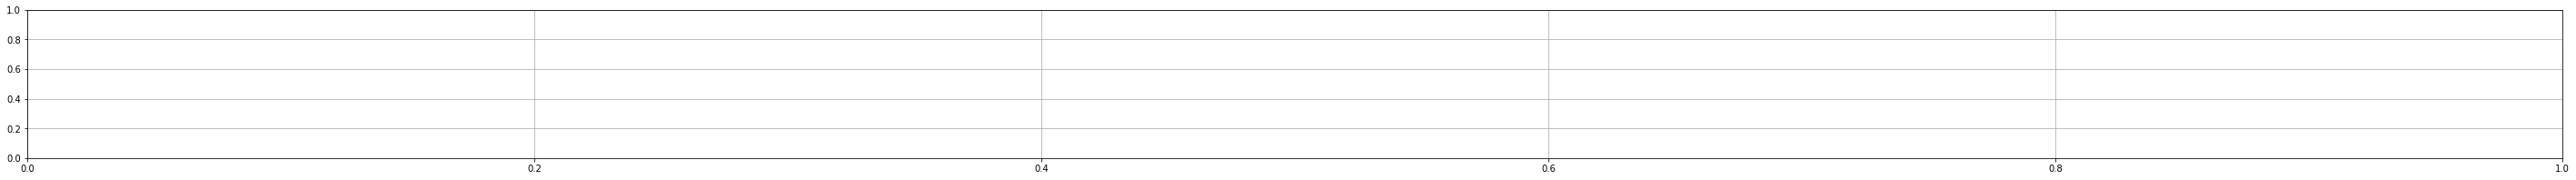

In [465]:
TAMANHO_GRAFICO=(50,3)
plt.figure(figsize=(TAMANHO_GRAFICO))
plt.grid(True)

plt.scatter(X[1:],Y,color='red')
plt.scatter(X[1:],result,color='blue')
#plt.scatter(X,resultln,color='green')


plt.show()

AttributeError: 'LinearRegression' object has no attribute 'square'